<a href="https://colab.research.google.com/github/annesofiedahl/M3-Exam/blob/main/M3_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement

The amount of data stored by businesses, is larger than ever before (Jackson, 2020), and because of this, companies now have to consider how to obtain value from this data. It is vital for a company to pay attention to the overall performance of the business, because it determines whether or not the company will be profitable. Furthermore it enables the possibility of conveying such data into valurable knowledge. With the increasing amount of data available to businesses, it is becomming even more essential to have the skills required to convert these data into meaningful information, that can be helpful to the employees, when dealing with, for instance, marketing or sales strategies. 

To demonstrate how datasets, created and maintained by individual business, can be processed and used to create meaningfull information for set business, a dataset in regards to Bank Marketing is used. The dataset is retrieved from a portugese financial institution, and this dataset is a good example of the data available within most firms today.

The data included origins from a Bank Marketing dataset, and is related to a direct marketing campaigns in the form of phone calls. The dataset includes data regarding 41.188 clients of the bank, hereof the clients _age, job, marital, education_; and whether the client has credit in _default, a housing loan and personal loans_. Furthermore the dataset contains information regarding the _date when a company employee was in contact with the customer last and the contact communication type_. The dataset also contains information regarding social and economic context attributes and some other attributes regarding the campaign at hand. Lastly, the dataset contains the output variable, that is; whether or not a client has subscribed a term deposit, which will be the variable of interest. 

This dataset has the possibility of demonstrating how businesses collected data can be used in predicting outcomes. In this case it will be useful to know whether or not a client will subscribe to a term deposit, only by looking at the attributes related to the individual client. This information can be used to develop better marketing campaigns, by targeting people that are more likely to buy this product. This way, the companies can optimize, for instance, direct or indirect marketing towards people that are product retractors or have doubts about a potential purchase. Thus data like this can be used for better and more specific marketing and can further create competetive advantages of the businesses market insights.

_Jackson, Jarret. "Businesses Have More Data Than Ever Before, But Do They Measure What They Manage?" Forbes, 15 July 2020. www.forbes.com/sites/jarretjackson/2020/07/15/businesses-have-more-data-than-ever-before-but-do-they-measure-what-they-manage/?sh=3808df57693a._


Thus the problem statement is;

_**"How accuracte can (financial) businesses use Machine Learning for predicting customers behaviour?"**_


To answer the problem statement, various machine learning models will be used, with the objective of predicting the classification of the subscription outcome (yes or no). Afterwards it's accuracy will be measured, and further tuning will be made.

## 1.1 Data importing

In [ ]:
# importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
#base model
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import metrics
from sklearn import model_selection
#deeplearning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1qVi6v1IwGQS4MJ4NwiR8hcpJy3PiBGtl/view?usp=sharing
#https://drive.google.com/file/d/1jbtgfZeBkjJlO9dXJKGj1JBrFmyxyPDt/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1jbtgfZeBkjJlO9dXJKGj1JBrFmyxyPDt'})

In [ ]:
fileDownloaded.GetContentFile('bank-additional-full.csv')

In [ ]:
# reading in file 
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 2. EDA and data preparation

Both the data exploration and data prepreration part of this notebook will be arranged in four parts according to the four categories of the dataset that was first described in the introduction, including; _bank client data, contact data, social economic data & other attributes._ 

## 2.1 Client Data

In [ ]:
# creating client dataframe
clientData = df.iloc[:,0:7]
clientData

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [ ]:
# creating values counts for each of the columns to see the distribution of these
jobDist = clientData['job'].value_counts()
ageDist = clientData['age'].value_counts()
maritalDist = clientData['marital'].value_counts()
educationDist = clientData['education'].value_counts()
defaultDist = clientData['default'].value_counts()
housingDist = clientData['housing'].value_counts()
loanDist = clientData['loan'].value_counts()

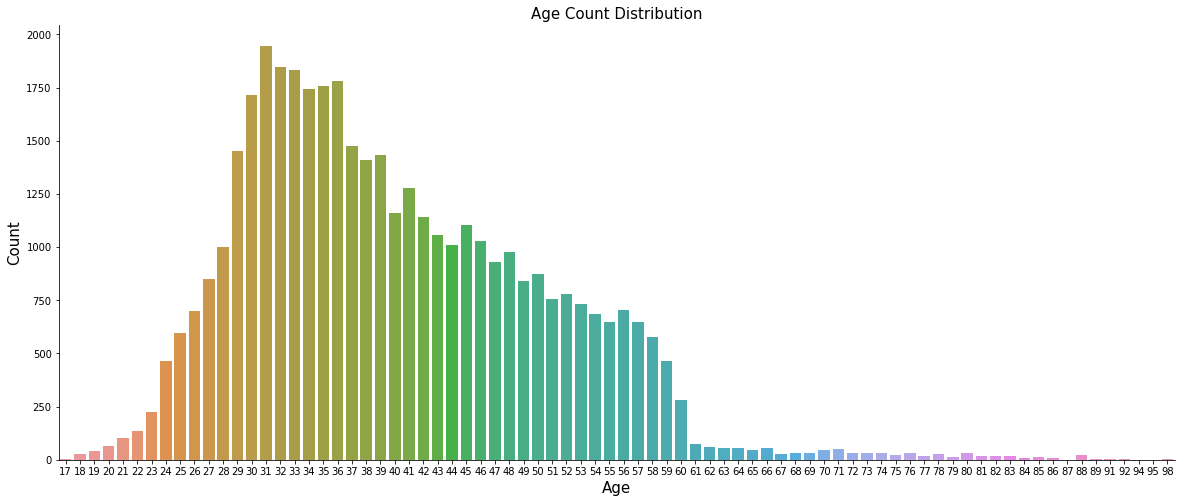

In [ ]:
# plotting the age distribution 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = clientData)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

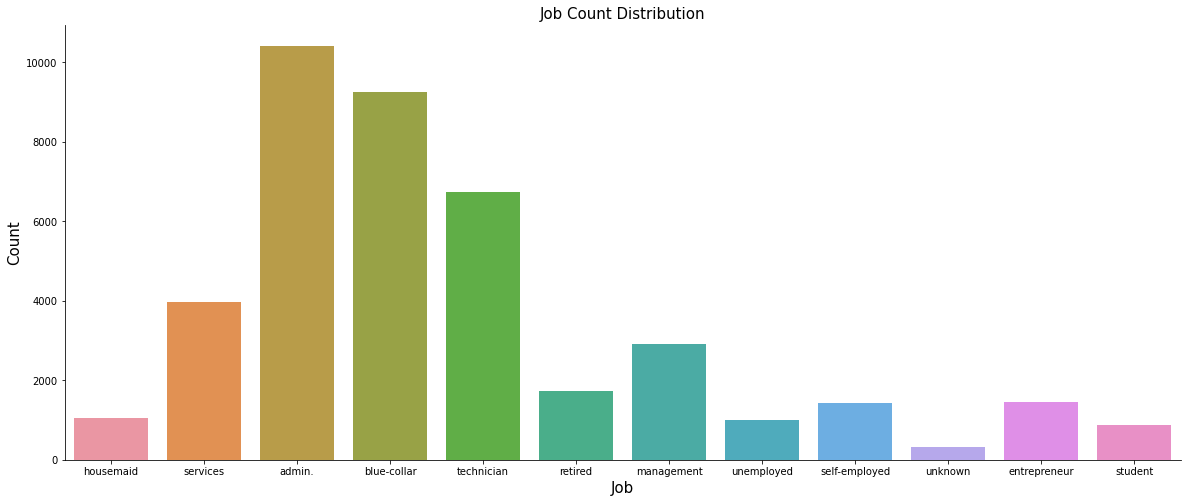

In [ ]:
# plotting the job distribution 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = clientData)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
sns.despine()

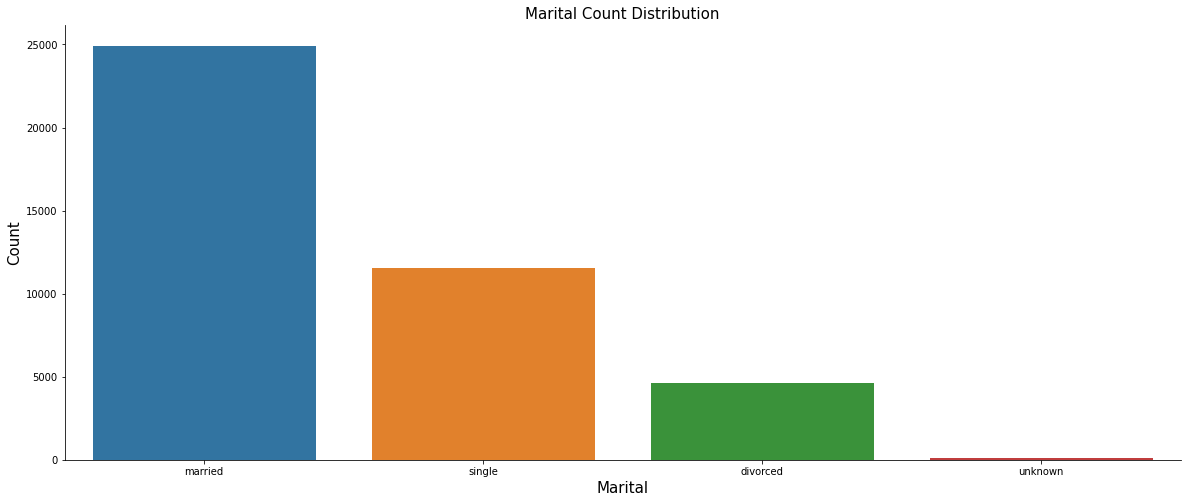

In [ ]:
# plotting the marital distribution 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = clientData)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
sns.despine()

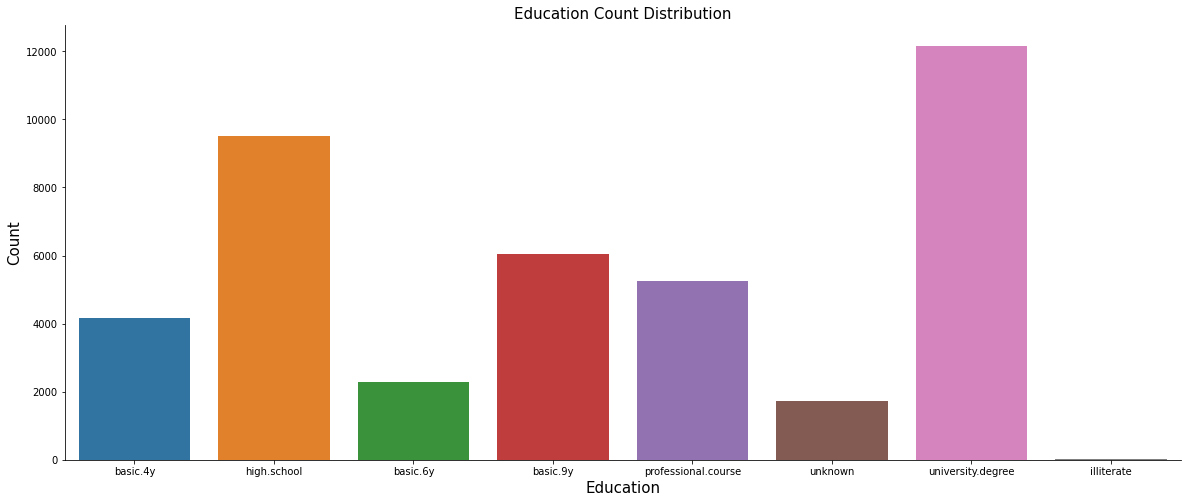

In [ ]:
# plotting the education distribution 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data = clientData)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
sns.despine()

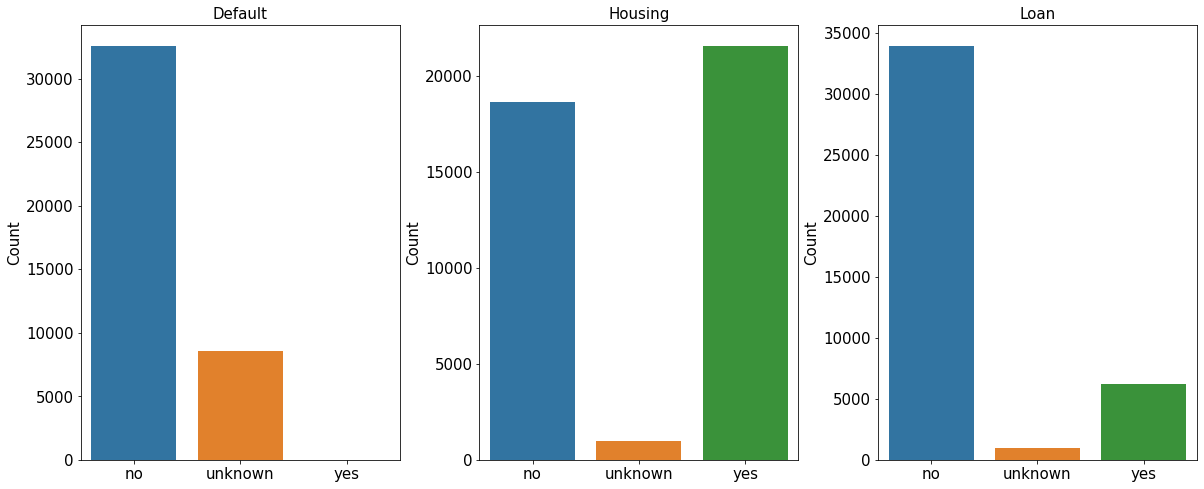

In [ ]:
# plotting the three columns regarding default, housing and personal loan 
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = clientData, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = clientData, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = clientData, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [ ]:
# the plot of the default column seems weird, so we'll check that 'yes' values exists
clientData[clientData['default'] == 'yes'].count()

age          3
job          3
marital      3
education    3
default      3
housing      3
loan         3
dtype: int64

Concluding the client data, it can be seen that the distribution of ages is between 17-98 years, which seems legit, and therefore it is chosen to not consider any of the high numbers with less frequency as outliers.
Further it can be seen that many of the clients jobs are related to administration, blue-collars or techincians, and also interesting is that the bank has a high number of clients with an university degree as well as clients with only a high school degree. 
The last three plots are showing the distribution of different loans for each client. The plot regarding the default indicates none or only a few clients with credits in default, which indeed is correct, as there are only 3 clients in that group.

Each of these columns - except the age column - has to be converted from categorical values to numerical values in order to use them for the machine learning algorithms later. For this the pandas.get_dummies will be used. The reason for using this approach is because it is considered relevant to not just convert each column value into its own unique value, because it results in a relation/comparison between the numerical values, which is not present in the these columns. The age column will be processed so that it will only contain 4 values instead of those 78 values. These are getting converted according to the quantiles. 



In [ ]:
# using the pd.get_dummies to create columns for each values in the columns 
clientData = pd.get_dummies(data = clientData, drop_first=True, columns = ['job'] , prefix = ['job'])
clientData = pd.get_dummies(data = clientData, drop_first=True, columns = ['marital'] , prefix = ['marital'])
clientData = pd.get_dummies(data = clientData, drop_first=True, columns = ['education'], prefix = ['education'])
clientData = pd.get_dummies(data = clientData, drop_first=True, columns = ['default'] , prefix = ['default'])
clientData = pd.get_dummies(data = clientData, drop_first=True, columns = ['housing'] , prefix = ['housing'])
clientData = pd.get_dummies(data = clientData, drop_first=True, columns = ['loan'] , prefix = ['loan'])

In [ ]:
# finding the age for each cutoff in the categories
print(clientData['age'].quantile(q = 0.25))
print(clientData['age'].quantile(q = 0.50))
print(clientData['age'].quantile(q = 0.75))
print(clientData['age'].quantile(q = 1.00))

32.0
38.0
47.0
98.0


In [ ]:
# defining 4 categories for the age column and changing the dataframe according to this
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

## 2.2 Contact Data

In [ ]:
# creating dataframe for data regarding the last contact 
contactData = df.iloc[:,7:11]
contactData.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [ ]:
# dropping the duration column 
contactData.drop('duration', axis = 1, inplace = True)

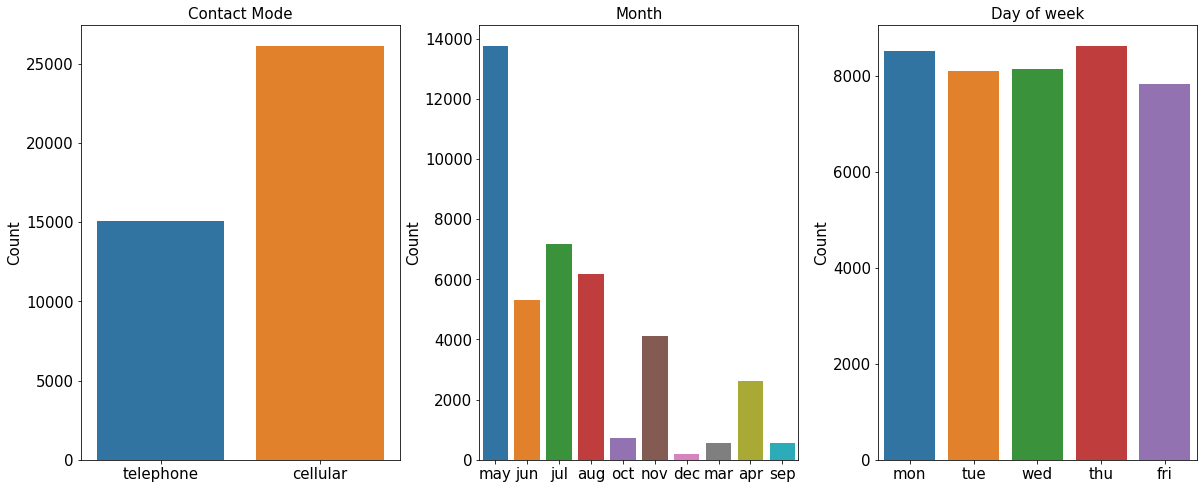

In [ ]:
# plotting the three columns regarding contact mode, month and day of week 
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'contact', data = contactData, ax = ax1)
ax1.set_title('Contact Mode', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'month', data = contactData, ax = ax2)
ax2.set_title('Month', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'day_of_week', data = contactData, ax = ax3)
ax3.set_title('Day of week', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

First off the duration column is dropped because it is told in the description of the dataset that this variable highly affects the output, but it is important to note that this variable is not known before the call is made. Because of this the variable will be removed from the dataset so that a more realistic predictive model can be optained. 
The other three columns distributions are showed in the plots afterwards. Nothing unusual to see here, so this will again be converted using the pd.get_dummies. 

In [ ]:
# using the pd.get_dummies to create columns for each values in the columns 
contactData = pd.get_dummies(data = contactData, columns = ['contact'] , prefix = ['contact'], drop_first=True)
contactData = pd.get_dummies(data = contactData, columns = ['month'] , prefix = ['month'], drop_first=True)
contactData = pd.get_dummies(data = contactData, columns = ['day_of_week'], prefix = ['day_of_week'], drop_first=True)

## 2.3 Economic and Social Data

In [ ]:
# creating the social and economic dataframe 
socialEconomic = df.iloc[:,15:20]
socialEconomic.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


All of these values are already numerical, and therefore no preprocessing of these inputs are needed. 

## 2.4 Other attributes

In [ ]:
otherAttr = df.iloc[:,11:15]
otherAttr.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [ ]:
otherAttr['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
otherAttr = pd.get_dummies(data = otherAttr, drop_first = True, columns = ['poutcome'] , prefix = ['poutcome'])
otherAttr.head()

,campaign,pdays,previous,poutcome_nonexistent,poutcome_success
0,1,999,0,1,0
1,1,999,0,1,0
2,1,999,0,1,0
3,1,999,0,1,0
4,1,999,0,1,0


For the other attributes of the dataset every column except the poutcome are already numerical values and does not need preprocessing. The same method for converting categorical values into numerical values are used here as before.
Afterwards this is getting concatenated into an X variable for our models. 

In [ ]:
# concatenating these dataframes to create the X value 
x = pd.concat([clientData, contactData, socialEconomic, otherAttr], axis = 1)


# 3. Model preparation

## 3.1 Target variable

In [ ]:
# creating the target variable and converting the categorical values to dummy variables
y = df['y']
y = pd.get_dummies(data = df['y'], columns = ['y'] , prefix = ['y'], drop_first=True)


In [ ]:
# checking the number count of each output variable 
y.value_counts()

['y']_yes
0            36548
1             4640
dtype: int64

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## 3.2 Train Test Split

The dataset is not split into a train and a test set with 20% being the test set. For this the sklearn library will be used. 

In [ ]:
# splitting the train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)

In [ ]:
# creating the smote predictor to oversample the data 
smote = SMOTE()

In [ ]:
# fit the smote function to X_train and y_train 
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# checking the difference in the original dataset and the new oversampled one 
print('Original dataset shape', len(X_train))
print('Oversampled dataset shape', len(X_smote))

Original dataset shape 30891
Oversampled dataset shape 54824


From the above calculation of the target variable, y, it can be seen that the dataset is imbalanced. For handling this it is nessesary to either do over- or undersampling, 

Here the target value is converted to dummy variables, but it is noticed that the dataset is imbalanced. There are two possibilities to handle this, either with doing undersampling or oversampling. For this problem the oversampling method will be used with the SMOTE. 

In [ ]:
y.value_counts()

['y']_yes
0            36548
1             4640
dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y, random_state=42)

# 4. Baseline Model

For the base model, a bootstrap aggregation (bagging) of the knn and decision tree model will be used. The bagging has the aim of strengthening the precision of knn and the decision tree model by combining them. Bagging also helps reduce the variance, hence eliminating the potential overfitting of the models. However, this is not applicable in this instance, since SMOTE has already been applied. Another option could be boosting for the base model, with both advantages and disadvantages (one of them being overfitting). 


In [ ]:
randomState = 42

In [ ]:
class modelClass():
    def __init__(self):
        self.data=[]

    def classification(self, clf, xTrain, xTest, yTrain, yTest):
        #prediction
        yTestPred = clf.predict(xTest)
        yTrainPred = clf.predict(xTrain)
        #accuracy
        accTest = accuracy_score(yTest, yTestPred)
        accTrain = accuracy_score(yTrain, yTrainPred)
        #roc (true positives, versus false positives)
        rocTest = roc_auc_score(yTest, yTestPred, multi_class='ovr')
        rocTrain = roc_auc_score(yTrain, yTrainPred, multi_class='ovr')
        #scoring
        precisionTest = precision_score(yTest, yTestPred)
        precisionTrain = precision_score(yTrain, yTrainPred)
        #classification report
        recallTest = recall_score(yTest, yTestPred)
        recallTrain = recall_score(yTrain, yTrainPred)
        print("Train accuracy:", accTrain)
        print("Test accuracy:", accTest)
        print("Train ROC: ", rocTrain)
        print("Test ROC: ", rocTest)
        print("Train precision: ", precisionTrain)
        print("Test precision: ", precisionTest)
        print("Train recall: ", recallTrain)
        print("Test recall: ", recallTest)

    def randomSearch(self, clf, params, xTrain, xTest, yTrain, yTest):
        scoreAndAccuracy = self.classification(clf, xTrain, xTest, yTrain, yTest)
        #choosing best best/optimal model
        randomSearcher = RandomizedSearchCV(estimator=clf, param_distributions=params, scoring='roc_auc', cv=5)
        randomSearcher.fit(xTrain, yTrain)
        bestModel = randomSearcher.best_estimator_
        return print("Best parameters: ", randomSearcher.best_params_), print("Best estimator: ", bestModel), print(scoreAndAccuracy)

classifier = modelClass()


## 4.1 KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
classifier.classification(knn, X_smote, X_test, y_smote, y_test)

Train accuracy: 0.6865059098205165
Test accuracy: 0.8907448771486841
Train ROC:  0.6865059098205165
Test ROC:  0.6235596173852076
Train precision:  0.9463116542994325
Test precision:  0.5227272727272727
Train recall:  0.39544724937983367
Test recall:  0.2792714657415438


In [ ]:
#bagging
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10), n_estimators = 10, n_jobs = 5, verbose=0)
classifier.classification(model.fit(X_smote, y_smote), X_smote, X_test, y_smote, y_test)


Train accuracy: 0.8727382168393404
Test accuracy: 0.7713897251626688
Train ROC:  0.8727382168393405
Test ROC:  0.8114043474400912
Train precision:  0.8114236947179128
Test precision:  0.31181447821999375
Train recall:  0.97118050488837
Test recall:  0.8629661751951431


## 4.2 Decision Tree

In [ ]:
decisionTree = DecisionTreeClassifier(random_state=randomState)
decisionTree.fit(X_train, y_train)
classifier.classification(decisionTree, X_train, X_test, y_train, y_test)

Train accuracy: 0.9954355637564339
Test accuracy: 0.8427697387588619
Train ROC:  0.9805329129355372
Test ROC:  0.6170117856039895
Train precision:  0.9982132221560452
Test precision:  0.30870279146141216
Train recall:  0.961284772010324
Test recall:  0.3261058109280139


In [ ]:
#getting best paramaters
paramGrid = {'max_depth':np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
             'min_samples_leaf':np.arange(3,30),
              'min_samples_split' : np.arange(3,30),
              'criterion': ('gini', 'entropy')}

classifier.randomSearch(decisionTree, paramGrid, X_train, X_test, y_train, y_test)

Train accuracy: 0.9954355637564339
Test accuracy: 0.8427697387588619
Train ROC:  0.9805329129355372
Test ROC:  0.6170117856039895
Train precision:  0.9982132221560452
Test precision:  0.30870279146141216
Train recall:  0.961284772010324
Test recall:  0.3261058109280139
Best parameters:  {'min_samples_split': 15, 'min_samples_leaf': 27, 'max_depth': 8, 'criterion': 'entropy'}
Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=27,
                       min_samples_split=15, random_state=42)
None


(None, None, None)

## 4.3 Base model with bootstrap aggregation

In [ ]:
#bagging with best parameters
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=25, min_samples_leaf=6, max_depth=6, criterion='entropy'))
classifier.classification(model.fit(X_smote, y_smote), X_smote,X_test,y_smote,y_test)

Train accuracy: 0.8483510871151321
Test accuracy: 0.8769544527532291
Train ROC:  0.8483510871151321
Test ROC:  0.7211488118408442
Train precision:  0.9086357411845258
Test precision:  0.45662100456621
Train recall:  0.774587771778783
Test recall:  0.5203816131830009


Thus, the test accuracy is slighty lowered from the original KNN model, however both ROC and recall of the models are increased by the aggregation. The model seems to performing acceptably, with a test accuracy of 87,6% a ROC of 72,52% a precision of 45,43% and a recall of 53%.

# 5. Artifical neural network

## 5.1 Architecture

Due to the nature of the data, an ANN model will be used. Had the data been sequence (where points are dependents on each other in the dataset), an RNN would have been used instead. However, since there is no dependency among the points, and the data is text and tabular with no fixed length as input, and no recurrent connection, the ANN model is deemed most likely. 

Thus, the model will not be using any memory neurons/layers such as LSTM.
For the input layer, a dense layer with 62 neurons, corresponding to the number of features, will be used. The activation function used for this will be the ReLu activation functions as this is currently seen as best practice over other activation functions such as Tanh.

For the output layer, a 1-neuron dense layer will be used, due to the binary classification task at hand. Furthermore, since the model is a binary classification model, the output layer will be using the sigmoid activation function. If the aim was multiclassification the softmax activation function would, most likely, be used instead. 
As for the hidden layers, a dense layer of n amount of neurons (determined later) will be used. This will be determined by trial-and-error testing of layers with a different number of neurons. 

Furthermore, the model will be using Adam as the optimizer, as this is also currently recognized as the best optimizer currently. 
Lastly, the model will be using the binary cross-entropy loss function, due to the binary classification objective. Were the task multiclassification (e.g., the customer will subscribe to a term deposit; yes/no/maybe), then the categorical cross-entropy would be used instead (along with the softmax activation function in the output layer). 

As mentioned earlier, the best way to find the right amount of layers and neurons in the ANN is by trial and error. Thus, different amount of nodes will be tested, using the KerasClassifier.

In [ ]:
def createModel(layers):
    model = Sequential()
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim = X_train.shape[1], activation='relu'))
        else:
            model.add(Dense(nodes, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

    return model

dl_model = KerasClassifier(build_fn=createModel, verbose = 0)

In [ ]:
layerList = [[64], [128], [256], [512]]
paramGrid = dict(layers=layerList, batch_size = [64, 128], epochs=[60])
grid = GridSearchCV(estimator=dl_model, param_grid=paramGrid)


In [ ]:
grid_result = grid.fit(X_train, y_train)

In [ ]:
[grid_result.best_score_, grid_result.best_params_]

[0.8942086100578308, {'batch_size': 128, 'epochs': 60, 'layers': [64]}]

## 5.2 Deep learning model

The best ANN seems to be with a hidden layer consisting of 64:

In [ ]:
dlmodel_0 = Sequential()
dlmodel_0.add(Dense(X_train.shape[1],activation='relu'))
dlmodel_0.add(Dense(64,activation='relu'))
dlmodel_0.add(Dense(1, activation='sigmoid'))
dlmodel_0.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
history = dlmodel_0.fit(X_smote, 
                    y_smote,
                    epochs = 60,
                    batch_size = 64,
                    verbose=0, validation_data=(X_test, y_test))

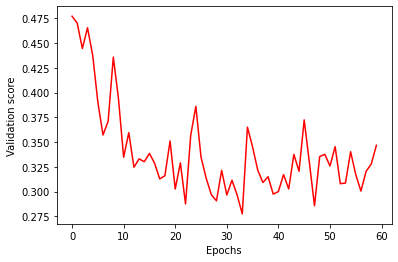

In [ ]:
plt.plot(history.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


## 5.3 Tuning

### 5.3.1 Addition of neurons

In an attempt to tune the model further, more neurons will be added to test whether the model improves, despite the previous gridsearchs results.

In [ ]:
dlmodel_1 = Sequential()
dlmodel_1.add(Dense(X_train.shape[1],activation='relu'))
dlmodel_1.add(Dense(256,activation='relu'))
dlmodel_1.add(Dense(1, activation='sigmoid'))
dlmodel_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
history1 = dlmodel_1.fit(X_smote, 
                    y_smote,
                    epochs = 60,
                    batch_size = 64,
                    verbose=0, validation_data=(X_test, y_test))

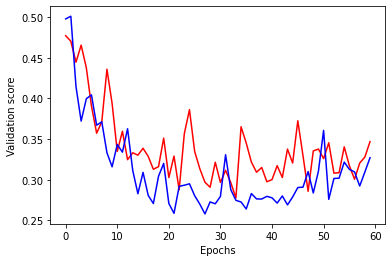

In [ ]:
plt.plot(history.history['val_loss'], 'r', history1.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


As shown, the models performance do indeed increase when increasing the amount of neurons.

### 5.3.2 Addition of layers

In [ ]:
dlmodel_2 = Sequential()
dlmodel_2.add(Dense(X_train.shape[1],activation='relu'))
dlmodel_2.add(Dense(64,activation='relu'))
dlmodel_2.add(Dense(64,activation='relu'))
dlmodel_2.add(Dense(1, activation='sigmoid'))
dlmodel_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
history2 = dlmodel_2.fit(X_smote, 
                    y_smote,
                    epochs = 60,
                    batch_size = 64,
                    verbose=0, validation_data=(X_test, y_test))

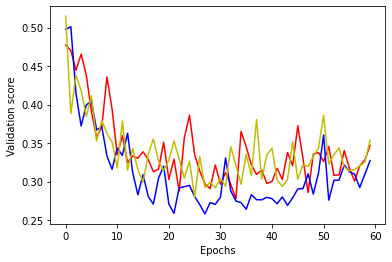

In [ ]:
plt.plot(history.history['val_loss'], 'r', history1.history['val_loss'], 'b', history2.history['val_loss'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


Adding another layer did not improve beyond the first attempt with the increase of neurons, however it did perform better than the single hidden layer model. This raises the question whether an increase of both layers and neurons will improve the models performance. 

### 5.3.3 Increase in layers and neurons

In [ ]:
dlmodel_3 = Sequential()
dlmodel_3.add(Dense(X_train.shape[1],activation='relu'))
dlmodel_3.add(Dense(256,activation='relu'))
dlmodel_3.add(Dense(256,activation='relu'))
dlmodel_3.add(Dense(1, activation='sigmoid'))
dlmodel_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
history3 = dlmodel_3.fit(X_smote, 
                    y_smote,
                    epochs = 60,
                    batch_size = 64,
                    verbose=0, validation_data=(X_test, y_test))

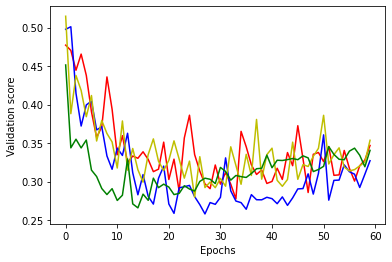

In [ ]:
plt.plot(history.history['val_loss'], 'r', history1.history['val_loss'], 'b', history2.history['val_loss'], 'y', history3.history['val_loss'], 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

As shown, adding more layers and more neurons did not improve the model. The first model remains the best performing. However, 2 of the models achieved a peak validation score of over 94%, and the first model with the lowest amount of loss as well, insinuating the better model in comparisson. 

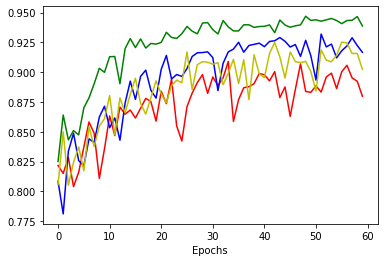

In [ ]:
plt.plot(history.history['val_accuracy'], 'r', history1.history['val_accuracy'], 'b', history2.history['val_accuracy'], 'y', history3.history['val_accuracy'], 'g')
plt.xlabel('Epochs')
plt.show()

Thus the best model is able to predict approximately 94% (on peak) of the subscriptions outcome correct.